# <b><u>Project Title : Seoul Bike Sharing Demand Prediction<u><b>

## Problem Description 

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# Data Description 

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information: 

* Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of the day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from seaborn.rcmod import set_style

import datetime as dt
from datetime import datetime

# Importing Models libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Importing warning for ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Load dataset and overview of data

In [2]:
# Load dataset

df = pd.read_csv('D:\\Alma batter\\Capstone projects\\2-Supervised ML-Regression\\2- Bike sharing demand prediction/SeoulBikeData.csv',encoding= 'unicode_escape')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
#Making a copy of dataset for safety purpose
df_copy = df.copy()

In [5]:
# Overview of Data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.shape

(8760, 14)

In [7]:
# columns in our dataset

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
#describing the data

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


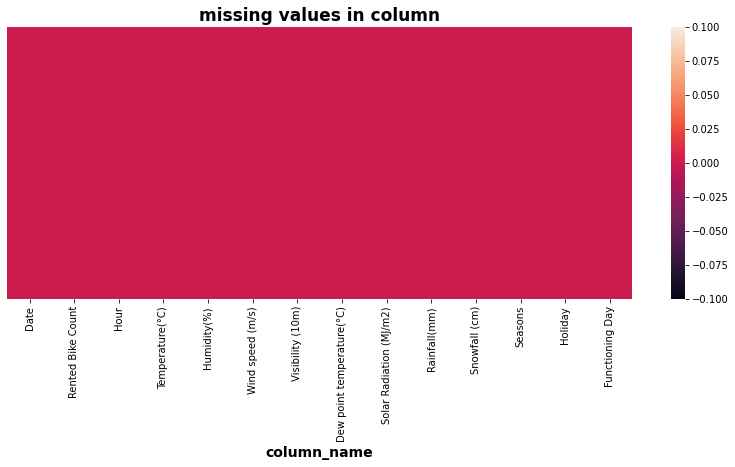

In [10]:
# Checking missing values

plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

In [11]:
#checking unique values
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [12]:
#checking duplicate values
print(len(df[df.duplicated()]))

0


### Observation: There is no missing and duplicate values in dataset

# Preprocessing

In [13]:
# finding the datatype of 'Date' column

type(df['Date'][0])

str

In [14]:
# converting string format of 'Date' column into date-time format

df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [16]:
# extracting day,month, day of week and weekdays/weekend from date column

df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : "Weekend" if x=='Saturday' or x=='Sunday' else "Weekday" )
df=df.drop(columns=['Date','day_of_week'],axis=1)

In [17]:
# Seasons present in dataset

df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [18]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Weekday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Weekday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Weekday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Weekday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Weekday


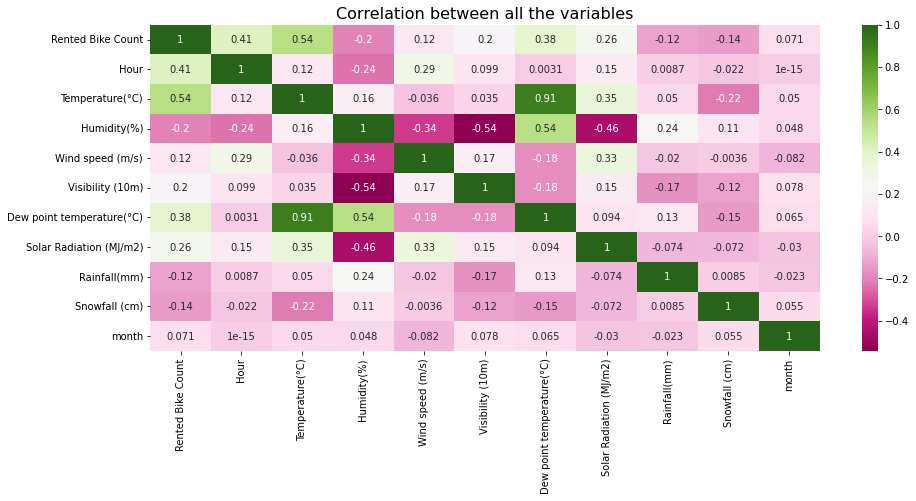

In [19]:
#checking correlation in feature using heatmap

plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)
plt.title('Correlation between all the variables', size=16)
plt.show()

### Observation : As Temperature and Dew point temperature(°C) has the high correlation. we should drop this column then it do not affect the outcome of our analysis.

In [20]:
# Drop dew point temperature column

df.drop(columns= ['Dew point temperature(°C)'], inplace=True)

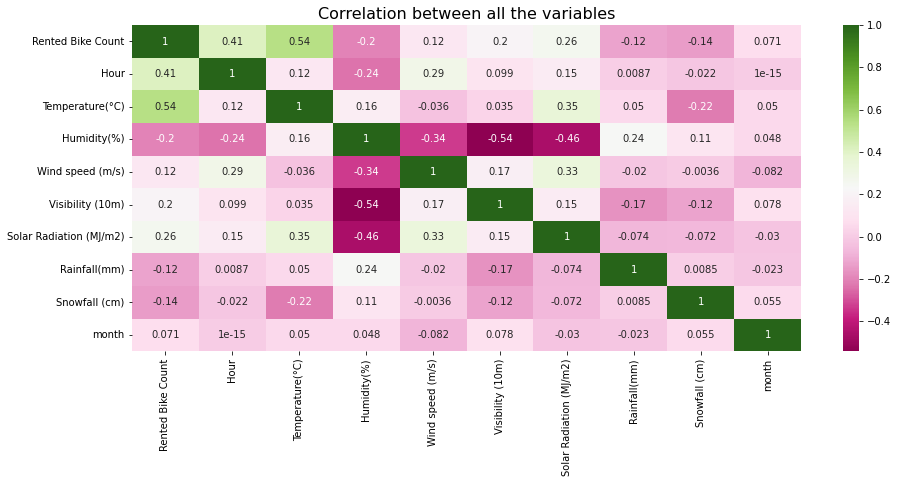

In [21]:
# Again plot correlation using heatmap

plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)
plt.title('Correlation between all the variables', size=16)
plt.show()

# Performing EDA

categorical_features

#### look at the data, Hour and month columns are a numerical columns but these are time stamp so we have to treat Hour and monthcolumn as a categorical feature

In [22]:
# convert Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

# convert month column integer to Categorical 
df['month']=df['month'].astype('object')


In [23]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [24]:
categorical_features

,Hour,Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,0,Winter,No Holiday,Yes,1,Weekday
1,1,Winter,No Holiday,Yes,1,Weekday
2,2,Winter,No Holiday,Yes,1,Weekday
3,3,Winter,No Holiday,Yes,1,Weekday
4,4,Winter,No Holiday,Yes,1,Weekday
...,...,...,...,...,...,...
8755,19,Autumn,No Holiday,Yes,11,Weekday
8756,20,Autumn,No Holiday,Yes,11,Weekday
8757,21,Autumn,No Holiday,Yes,11,Weekday
8758,22,Autumn,No Holiday,Yes,11,Weekday


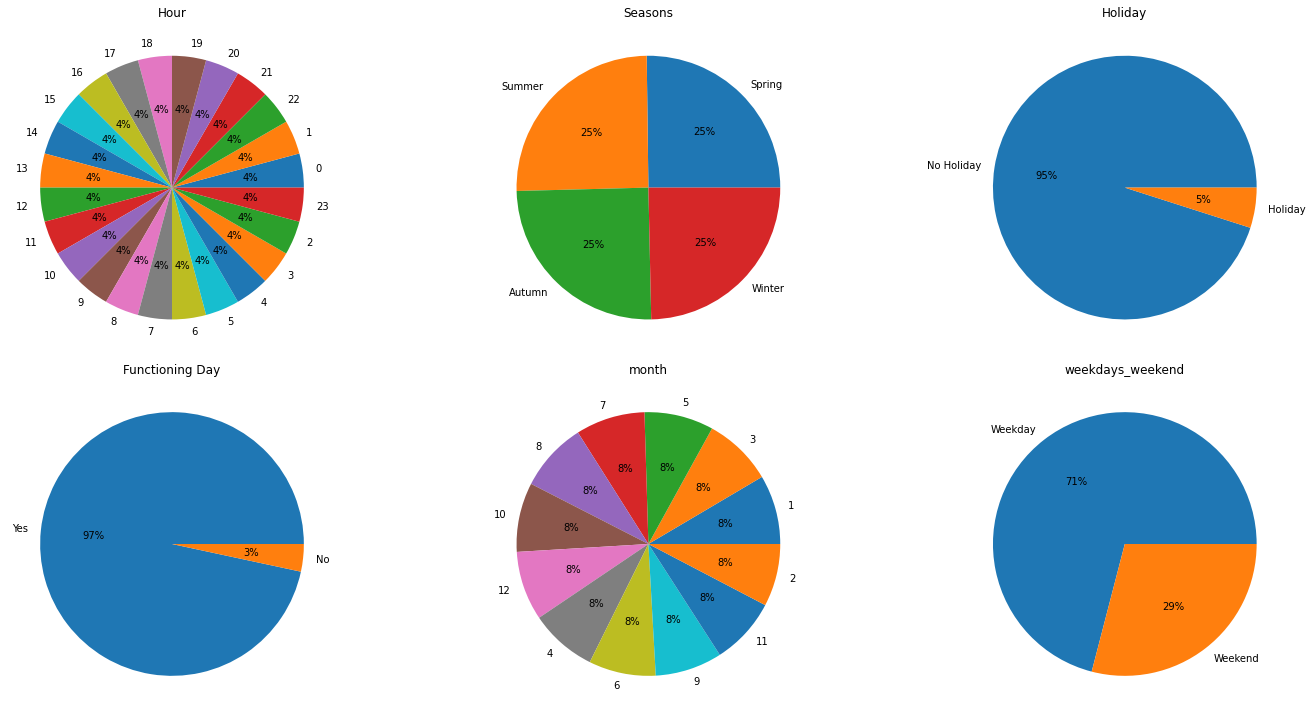

In [25]:
# creating pieplot for all categorical feature
n=1
plt.figure(figsize=(20,15))
for i in categorical_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  plt.pie(df[i].value_counts(),labels = df[i].value_counts().keys().tolist(),autopct='%.0f%%')
  plt.title(i)
  plt.tight_layout()

In [26]:
# checking categorical column value count
for i in categorical_features.columns:
  print("\n ")
  print('column name  : ', i)
  print(df[i].value_counts())


 
column name  :  Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

 
column name  :  Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

 
column name  :  Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

 
column name  :  Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64

 
column name  :  month
1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: month, dtype: int64

 
column name  :  weekdays_weekend
Weekday    6216
Weekend    2544
Name: weekdays_weekend, dtype: int64


### Explore our categorical feature and Trying to take some important information from the categorical feature

Text(0.5, 1.0, 'Count of Rented bikes based on Functioning Day')

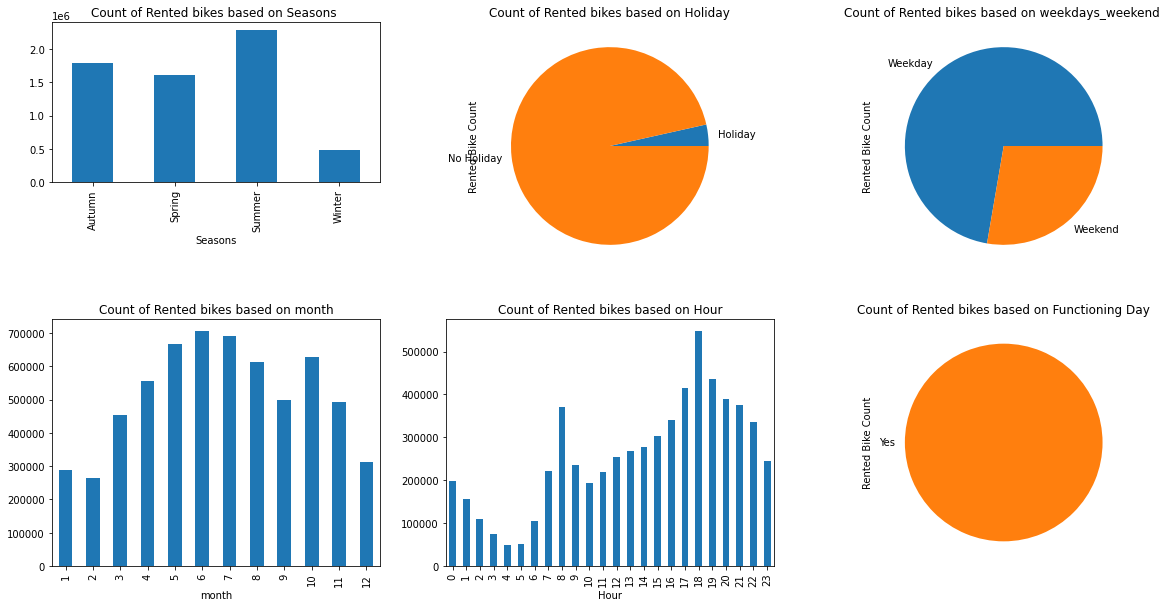

In [27]:
# Average values across each of the categorical columns 

fig = plt.figure(figsize=(20, 10))
axes = fig.add_subplot(3, 3, 1)
df_season = df.groupby('Seasons').sum()
df_season['Rented Bike Count'].plot(kind='bar')
plt.title('Count of Rented bikes based on Seasons ')

axes = fig.add_subplot(2, 3, 2)
df_hol = df.groupby('Holiday').sum()
df_hol['Rented Bike Count'].plot(kind='pie')
plt.title('Count of Rented bikes based on Holiday')

axes = fig.add_subplot(2, 3, 3)
df_week = df.groupby('weekdays_weekend').sum()
df_week['Rented Bike Count'].plot(kind='pie')
plt.title('Count of Rented bikes based on weekdays_weekend ')

axes = fig.add_subplot(2, 3, 4)
df_mon = df.groupby('month').sum()
df_mon['Rented Bike Count'].plot(kind='bar')
plt.title('Count of Rented bikes based on month')

axes = fig.add_subplot(2, 3, 5)
df_hour = df.groupby('Hour').sum()
df_hour['Rented Bike Count'].plot(kind='bar')
plt.title('Count of Rented bikes based on Hour')

axes = fig.add_subplot(2, 3, 6)
df_hour = df.groupby('Functioning Day').sum()
df_hour['Rented Bike Count'].plot(kind='pie')
plt.title('Count of Rented bikes based on Functioning Day')

### Observation: 

Most of bikes have been rented in summer followed by Autumn, Spring and Winter.

Use of rented bike is more on 'No holiday' means on working days as compared to 'Holiday'.

Most of the bikes have been rented on working days.

People generally use rented bikes during their working hours.

People use rented bike only in functioning day.

### value Counts in percentage and visualization of value counts

In [28]:
# using for loop and getting all value Counts in percentage of categorical features
for i in categorical_features.columns:
  print('feature name : ',i)
  print(df[i].value_counts(normalize=True))
  print('\n')

feature name :  Hour
0     0.041667
1     0.041667
22    0.041667
21    0.041667
20    0.041667
19    0.041667
18    0.041667
17    0.041667
16    0.041667
15    0.041667
14    0.041667
13    0.041667
12    0.041667
11    0.041667
10    0.041667
9     0.041667
8     0.041667
7     0.041667
6     0.041667
5     0.041667
4     0.041667
3     0.041667
2     0.041667
23    0.041667
Name: Hour, dtype: float64


feature name :  Seasons
Spring    0.252055
Summer    0.252055
Autumn    0.249315
Winter    0.246575
Name: Seasons, dtype: float64


feature name :  Holiday
No Holiday    0.950685
Holiday       0.049315
Name: Holiday, dtype: float64


feature name :  Functioning Day
Yes    0.966324
No     0.033676
Name: Functioning Day, dtype: float64


feature name :  month
1     0.084932
3     0.084932
5     0.084932
7     0.084932
8     0.084932
10    0.084932
12    0.084932
4     0.082192
6     0.082192
9     0.082192
11    0.082192
2     0.076712
Name: month, dtype: float64


feature name :  week



################################################## Hour ##################################################




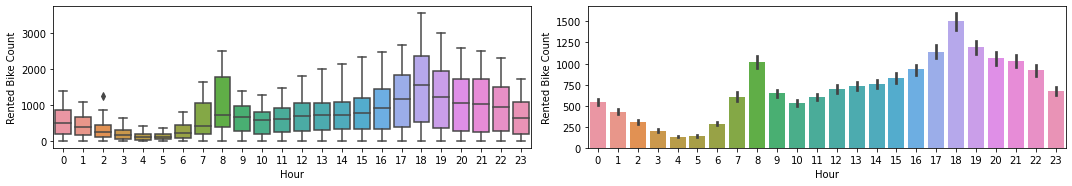



################################################## Seasons ##################################################




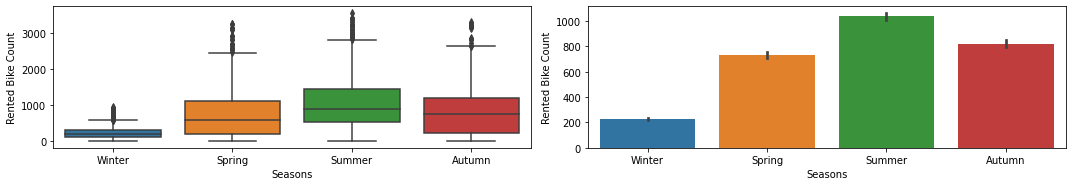



################################################## Holiday ##################################################




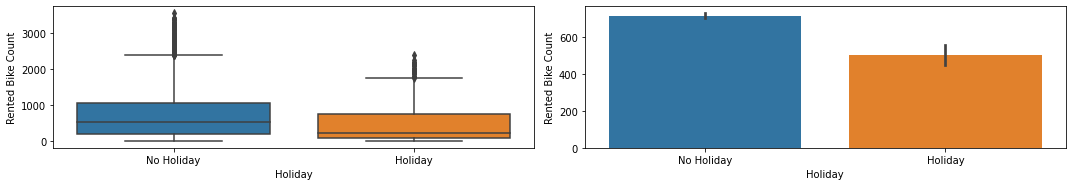



################################################## Functioning Day ##################################################




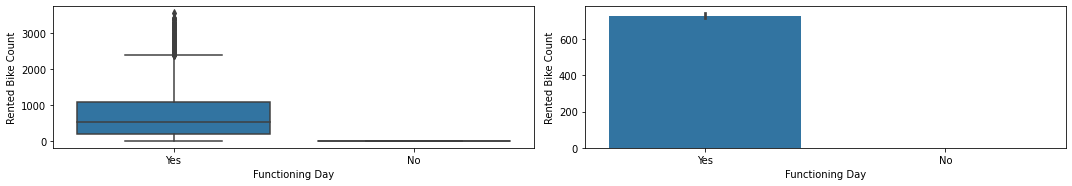



################################################## month ##################################################




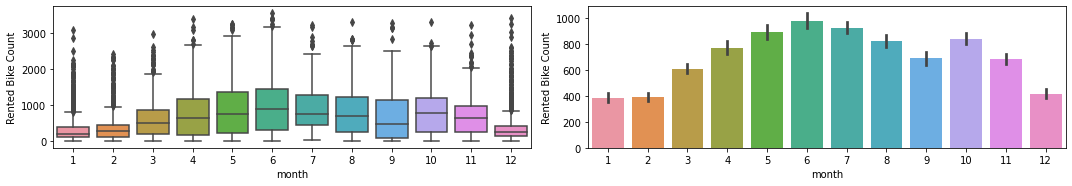



################################################## weekdays_weekend ##################################################




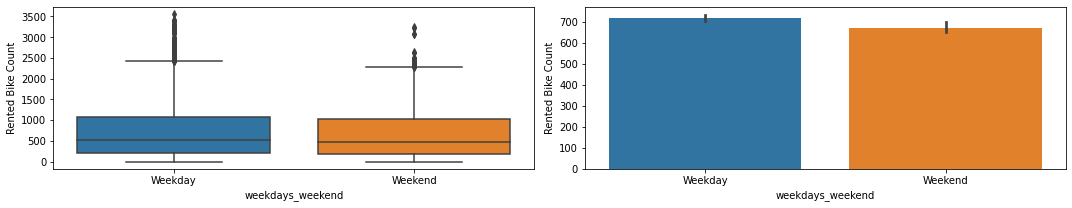

In [29]:
# creating boxplot plot and bar plot
n=1
for i in categorical_features.columns:
    plt.figure(figsize=(15,15))
    plt.subplot(6,2,n)
    n+=1
    print('\n')
    print('#'*50,i,'#'*50)
    print('\n')
    sns.boxplot(x=df[i],y=df["Rented Bike Count"])
    plt.subplot(6,2,n)
    n+= 1
    sns.barplot(x=df[i],y=df['Rented Bike Count'])
    plt.tight_layout()
    plt.show()

## Numeric features

#### Now the time of Explore our numerical feature and Trying to take some important information from the Numeical feature

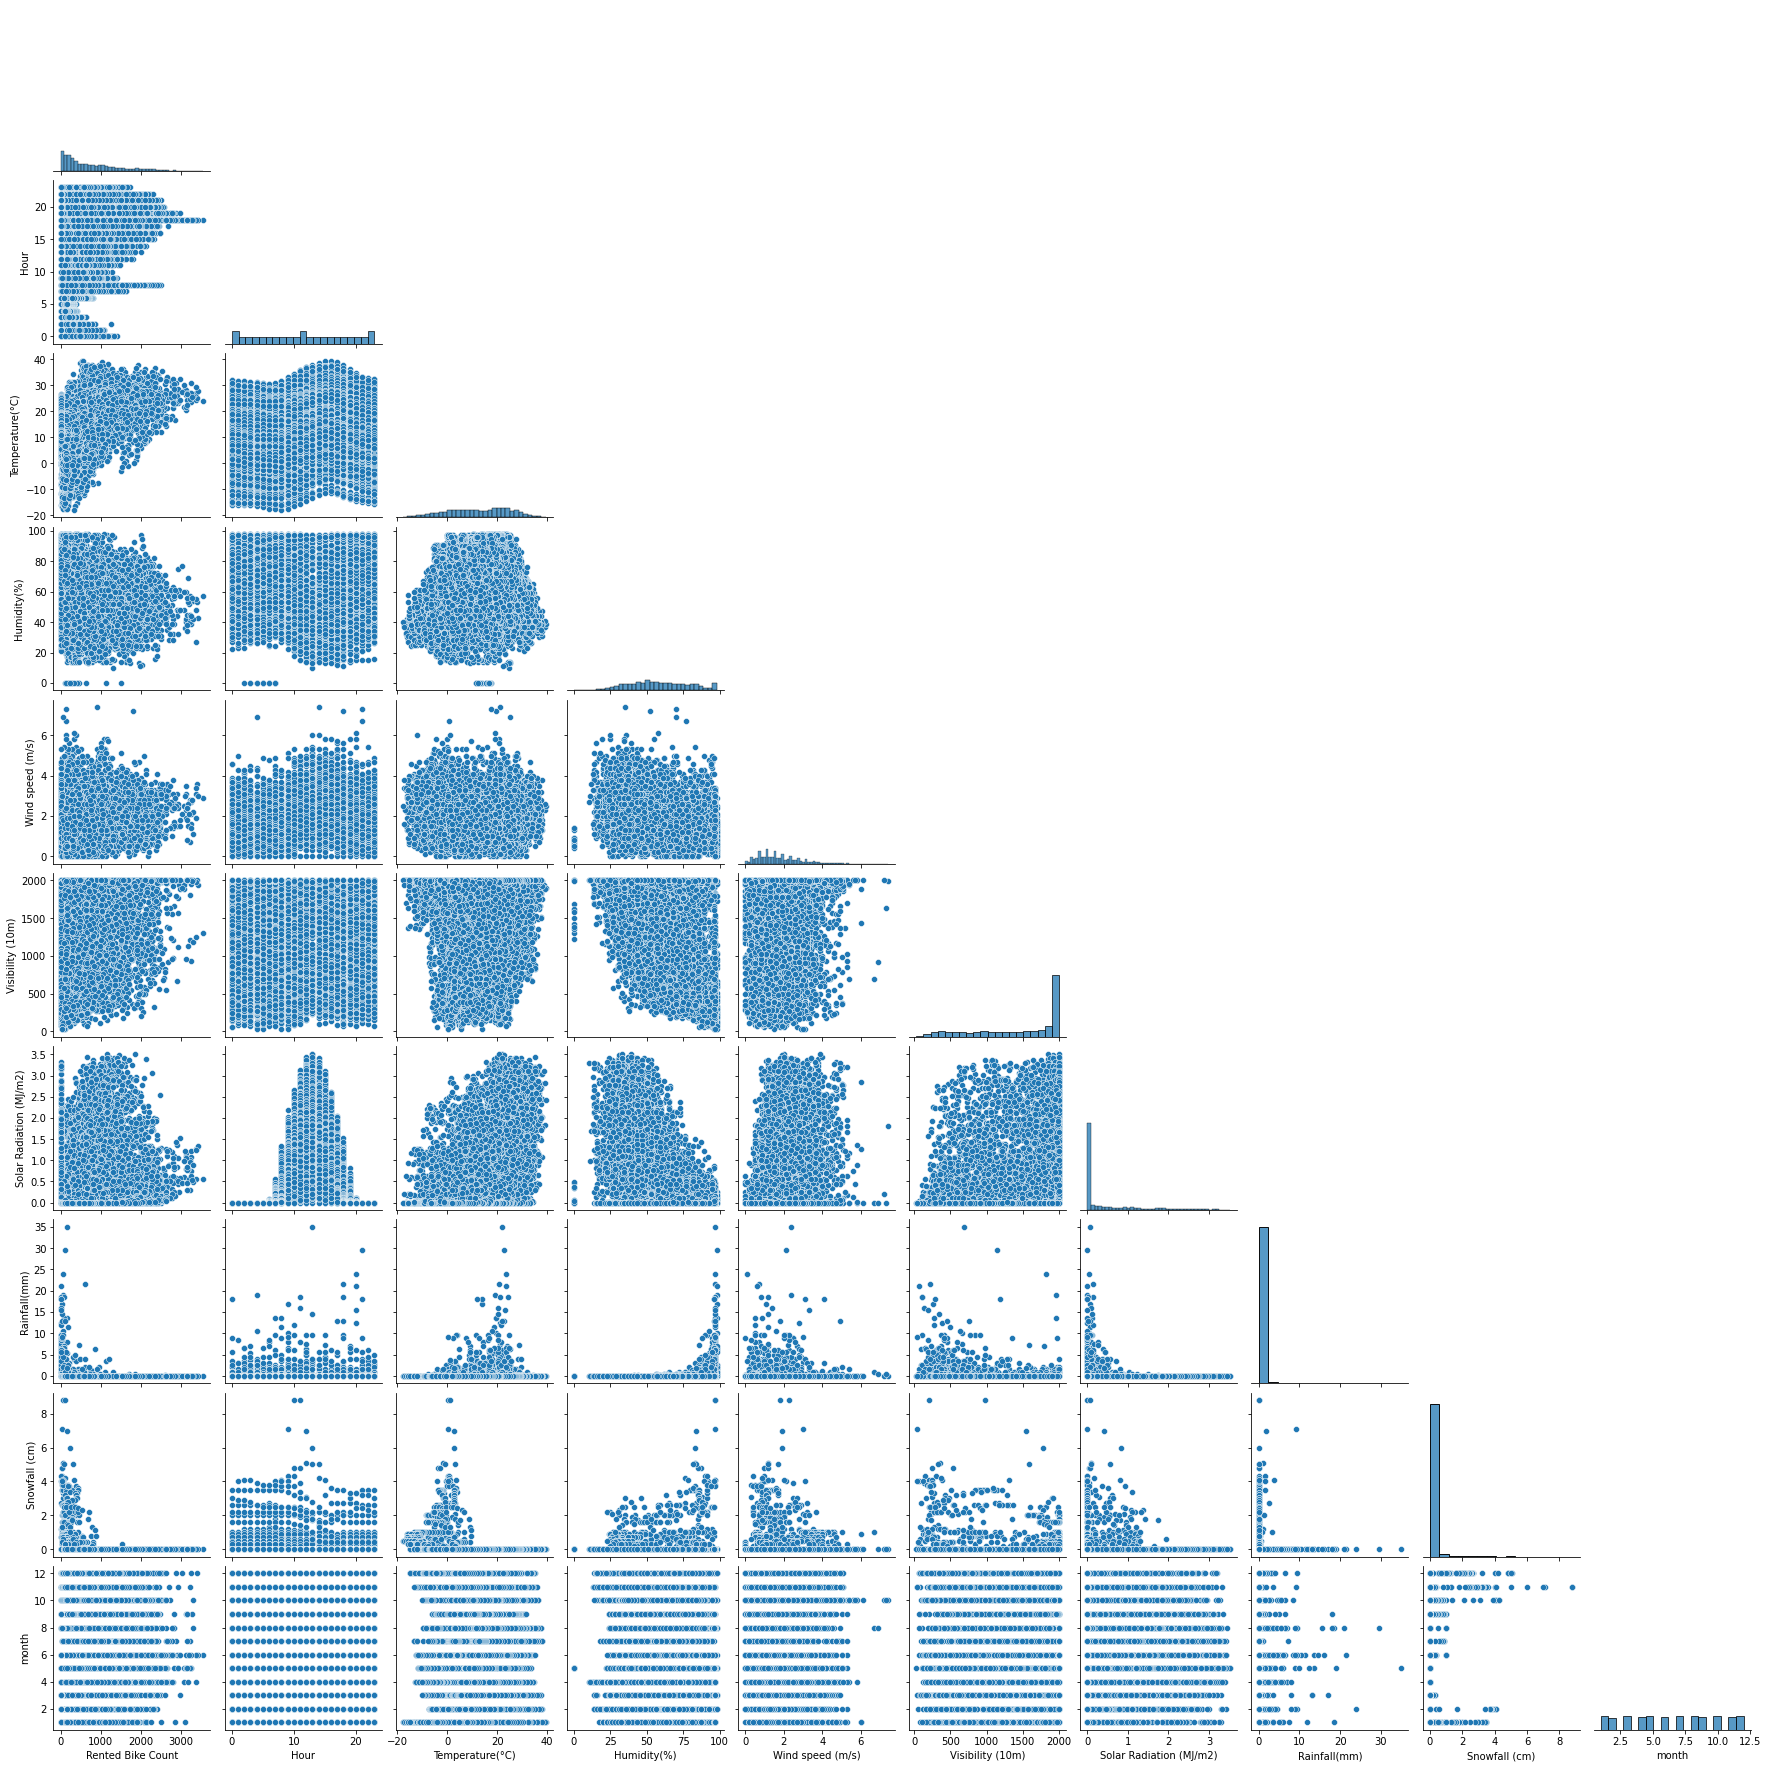

In [30]:
#ploting pairplot for more info
sns.pairplot(df, corner=True)

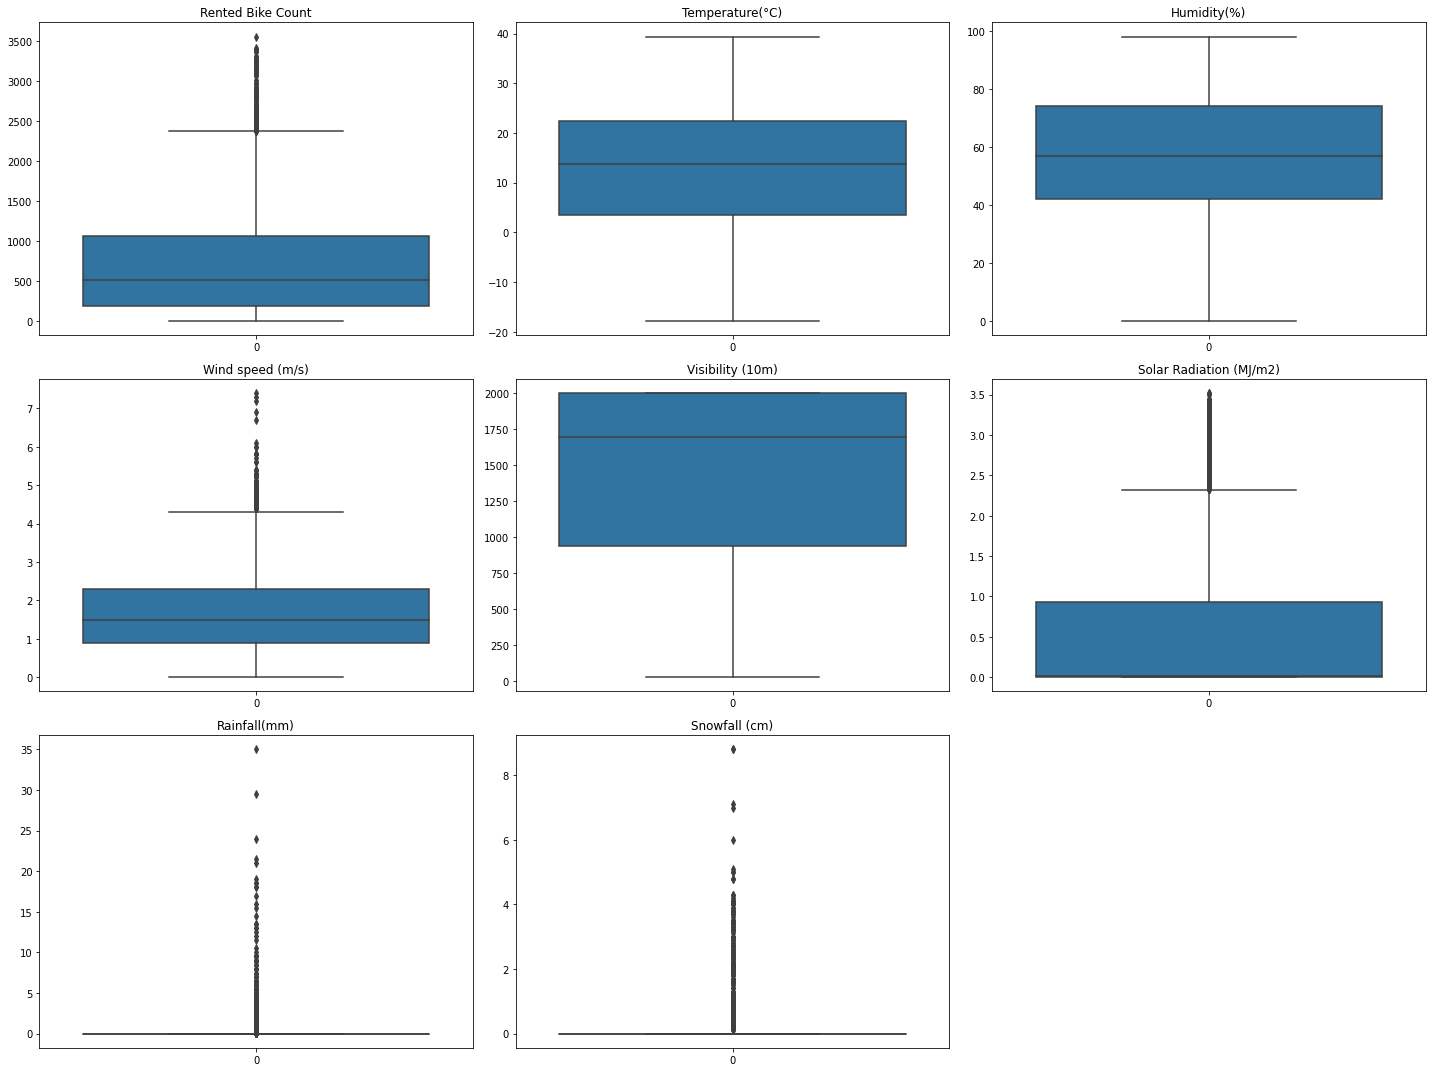

In [31]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()



################################################## Rented Bike Count ##################################################




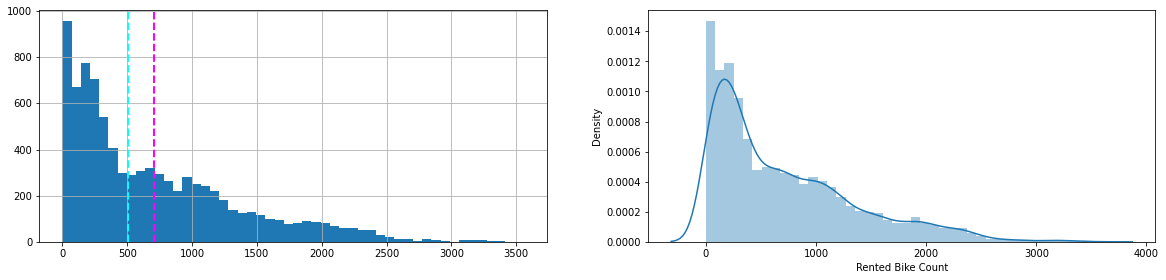



################################################## Temperature(°C) ##################################################




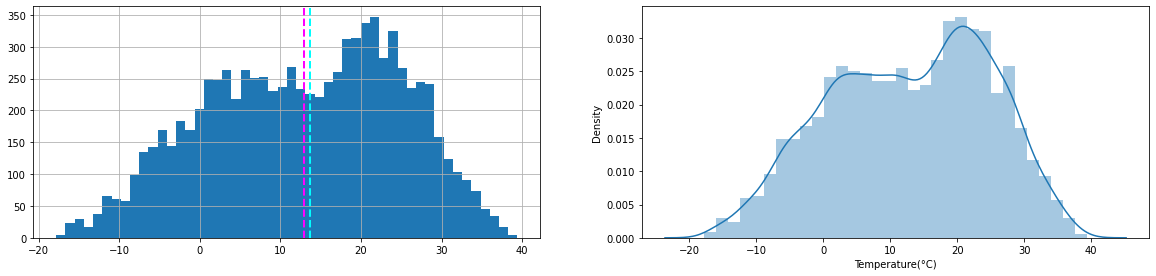



################################################## Humidity(%) ##################################################




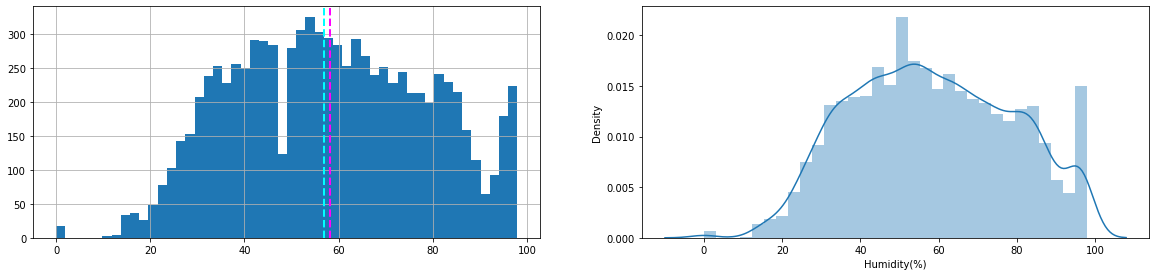



################################################## Wind speed (m/s) ##################################################




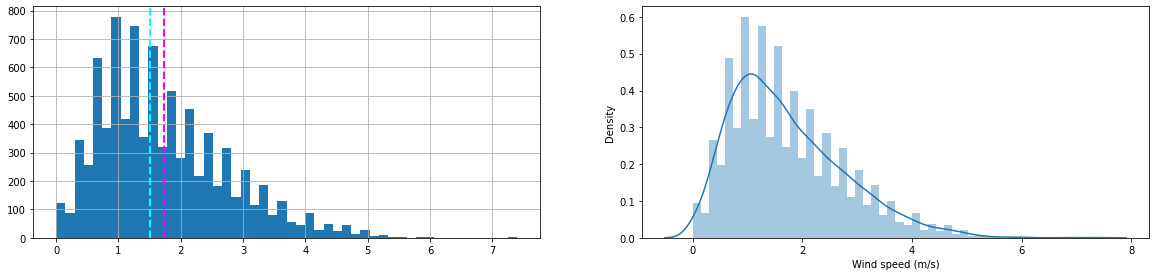



################################################## Visibility (10m) ##################################################




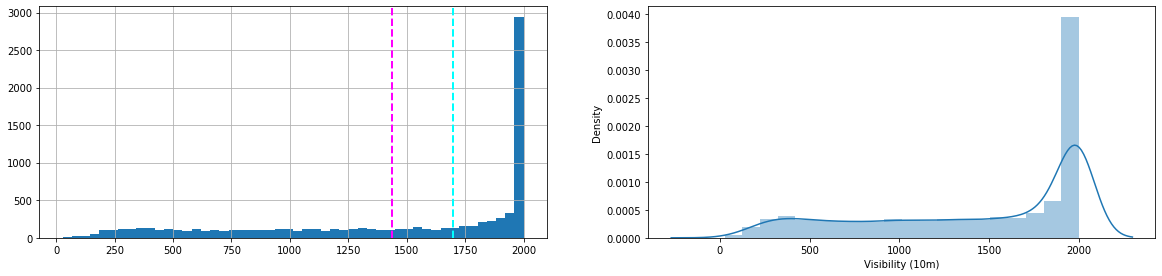



################################################## Solar Radiation (MJ/m2) ##################################################




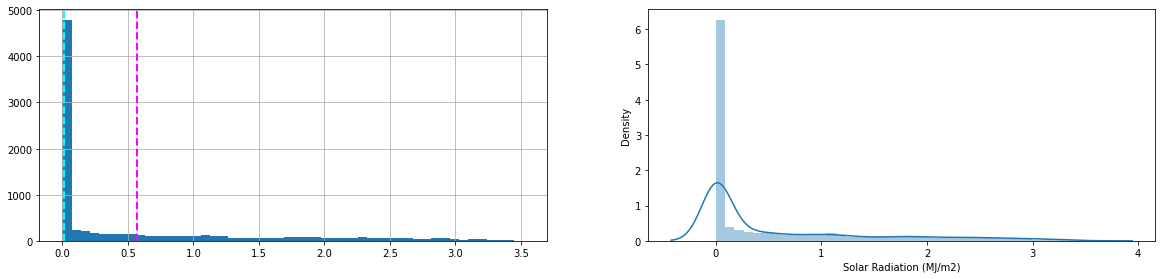



################################################## Rainfall(mm) ##################################################




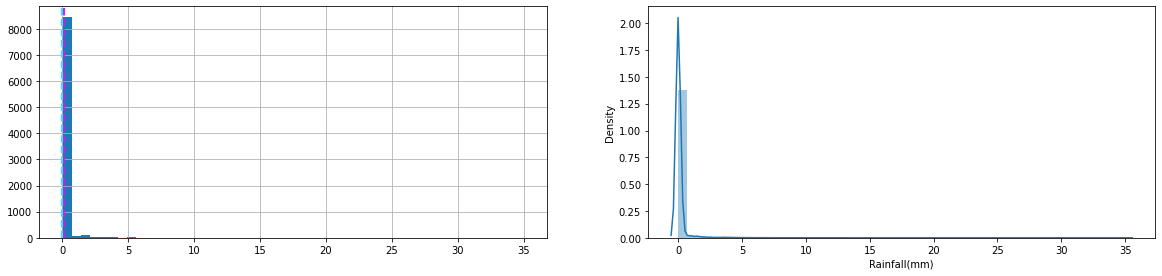



################################################## Snowfall (cm) ##################################################




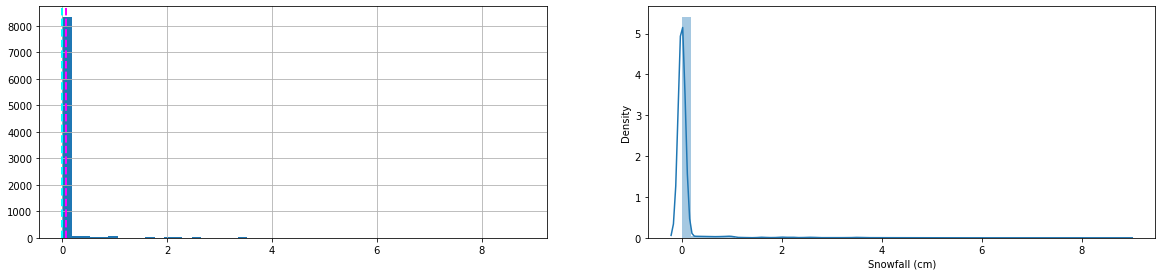

In [32]:
#plotting histogram with mean and median, and distplot of all the numeric features of the dataset
n=1
for i in numeric_features.columns:
  plt.figure(figsize=(20,40))
  plt.subplot(8,2,n)
  n+=1
  print('\n')
  print('#'*50,i,'#'*50)
  print('\n')
  # fig=plt.figure()
  # ax=fig.gca()
  feature=df[i]
  feature.hist(bins=50,)
  plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) 
  plt.subplot(8,2,n)
  n+= 1
  sns.distplot(df[i])
  # plt.tight_layout()
  plt.show()


### Observation :

Most of people rented bikes when there is no or less rainfall.

Most of people rented bikes when there is no or less snowfall.

Most of people rented bikes when the temperature is between -5 to 25 degrees.

Most of people rented bikes when the visibility is between 300 to 1700.

Observations: 


*   Rented Bike Count has moderate skewness toward right. And, we already know that assumption of linear regression tells us that the distribution of dependent variable has to be normal, hence we will perform some operation to make it normal.

*  After applying the Square Rooting the skewed Rented Bike Count, we almost got the normal distribution.




### From Histogram we are coming to know that the features which are skewed, their mean and the median are also skewed, which was understood by looking at the graph that this would happen.

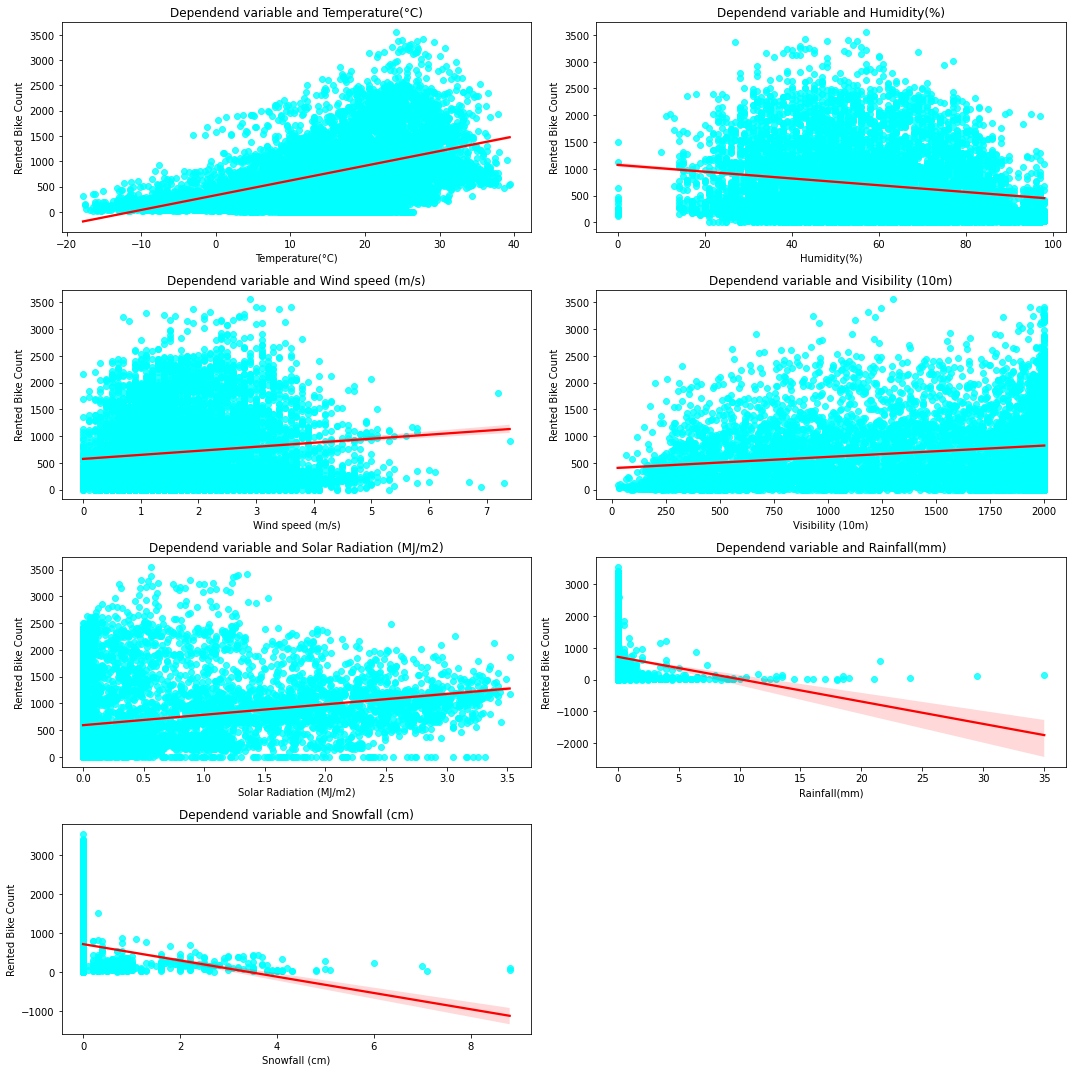

In [33]:
# Regression plot to know relation with our independent variable
n=1
plt.figure(figsize=(15,15))
for i in numeric_features.columns:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(x=df[i], y=df['Rented Bike Count'],scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()

In [34]:
# function to calculate Multicollinearity

# checking the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
  
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  vif_data['VIF'] = round(vif_data['VIF'],2)
  return(vif_data)

**Normalising Rented Bike Count Column Data**

In [35]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,feature,VIF
0,Temperature(°C),3.17
1,Humidity(%),4.76
2,Wind speed (m/s),4.08
3,Visibility (10m),4.41
4,Solar Radiation (MJ/m2),2.25
5,Rainfall(mm),1.08
6,Snowfall (cm),1.12


After applying the Square Rooting the skewed Rented Bike Count, we almost got the normal distribution.

**Creating dummy variables and performing the one hot encoding to the dataset:**

In [36]:
#Changing the int64 column into category column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  df[col]= df[col].astype('category')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  month                    8760 non-null   category
 13  weekdays_weekend         8760 non-null   category
dtypes: categ

In [38]:
#using pandas get dummies for encoding categorical features
df1= pd.get_dummies(df,drop_first=True,sparse = True)
df1.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_Weekend
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Model Training**

In [39]:
#Data splitting and value assigning to variables for Regression

X = df1.drop(['Rented Bike Count'], axis = 1)
y = np.sqrt(df1['Rented Bike Count'])

In [40]:
X.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_Weekend
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

## **Implementing Linear Regression**

In [127]:
# Train test spliting

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.20, random_state =0)
print(X_train.shape)
X_test.shape

(7008, 47)


(1752, 47)

In [128]:
# initalizing the model
reg = LinearRegression().fit(X_train,y_train)

In [129]:
# Checking score
reg.score(X_train,y_train)

0.7577721255927354

In [130]:
#Checking Coefficent
reg.coef_

array([ 4.69159669e-01, -1.33778588e-01, -1.54679697e-01,  6.26366033e-04,
        1.12042152e+00, -1.52421625e+00,  2.79799757e-02, -1.86940267e+00,
       -4.90148817e+00, -7.27410013e+00, -9.53957339e+00, -9.17923567e+00,
       -4.14235276e+00,  2.07149688e+00,  7.30417581e+00,  1.03467972e+00,
       -3.38140659e+00, -3.74740554e+00, -2.97214965e+00, -3.16836186e+00,
       -3.20026704e+00, -1.99897412e+00,  1.04326353e-01,  3.90346150e+00,
        1.04589523e+01,  6.92903557e+00,  6.21924936e+00,  6.50831026e+00,
        5.14684736e+00,  1.59176403e+00, -2.72431109e+00, -3.28365312e+00,
       -6.67834286e+00,  2.87701367e+00,  2.79331015e+01, -7.71559653e-01,
        3.08433567e-01,  4.31055133e-01,  1.49402368e+00,  4.25263499e+00,
       -1.34411688e-01, -7.22487949e-01,  2.59847744e-01,  2.19941265e+00,
        1.01562148e+00,  1.13560915e+00, -7.16850511e-01])

In [131]:
#Predicted Train & Test values
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [132]:
# Calculating Performance Metrics for training data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)


MSE : 37.38378425104445
RMSE : 6.1142280175868855
MAE : 4.643806855400774
R2 : 0.7577721255927354
Adjusted R2 : 0.751090957695352


In [133]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [134]:
#Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.17135560655836
RMSE : 6.0968316039200525
MAE : 4.6873332915845
R2 : 0.7639707980063419
Adjusted R2 : 0.75746060288093


In [135]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

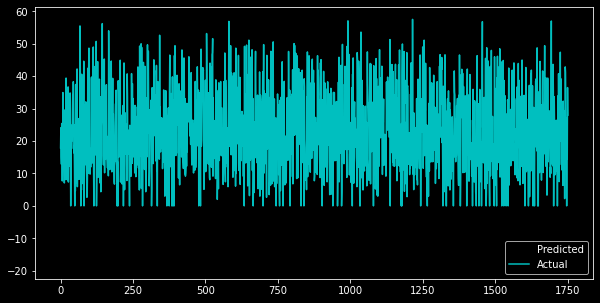

In [136]:
#Plotting the figure
plt.figure(figsize=(10,5))
plt.plot(y_pred_test, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

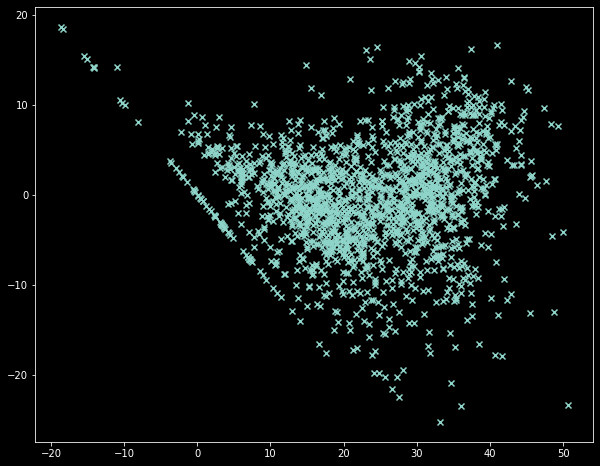

In [137]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test),(y_test)-(y_pred_test),marker='x')

## **Implementing Ridge Regression(L2 regularization)**

In [53]:
# Initalizing ridge regression
ridge = Ridge(alpha = 0.1)

ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [54]:
#checking score

ridge.score(X_train,y_train)

0.7596207857823188

In [55]:
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [56]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.27630255811988
RMSE : 6.1054322171423605
MAE : 4.648421542821053
R2 : 0.7596207857823188
Adjusted R2 : 1.0223608571365286


In [57]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [58]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 41.91866348573951
RMSE : 6.474462409014319
MAE : 5.24138845769339
R2 : -0.7201257885631742
Adjusted R2 : 1.1600117012616906


In [59]:
dict2={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

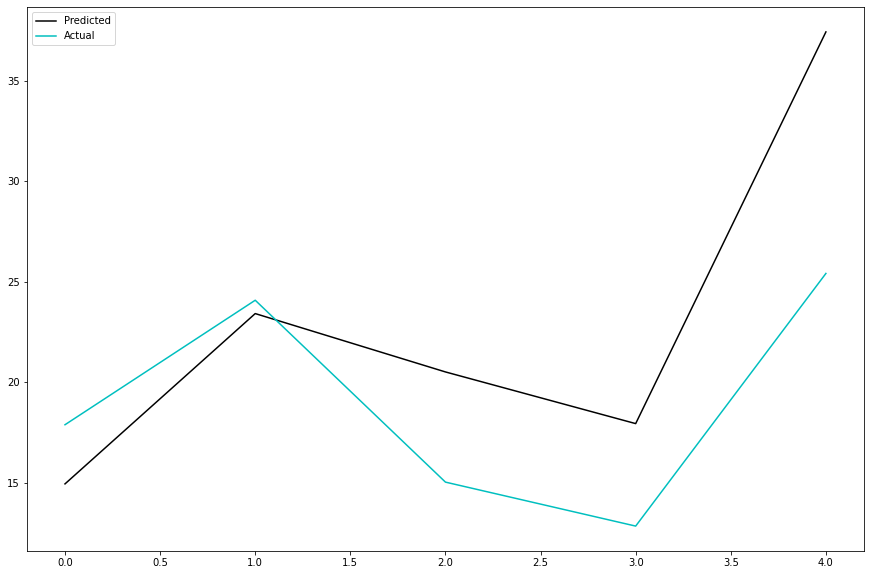

In [60]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_ridge, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

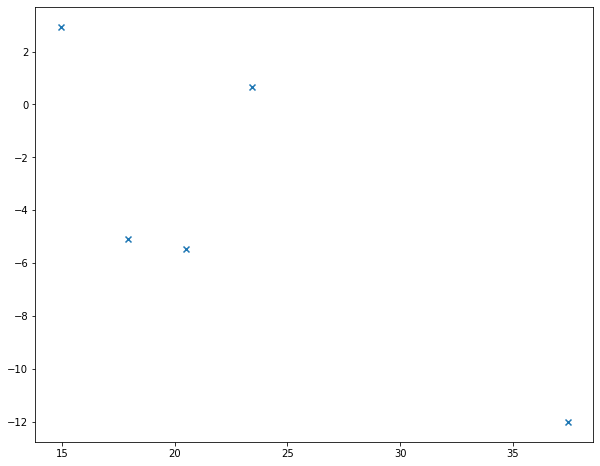

In [61]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge),marker='x')

## **Implementing Lasso Regression** **(L1 Regularization)**

In [62]:
# Initalizing lasso regression
lasso = Lasso(alpha = 1, max_iter= 1000)
lasso.fit(X_train, y_train)

# Creating the model score
print(lasso.score(X_test, y_test))
print(lasso.score(X_train, y_train))

-0.024805933575305472
0.4009827724674596


In [63]:
# Predicted Train & Test values
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [64]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 92.89134039188771
RMSE : 9.638015376201041
MAE : 7.306003478594665
R2 : 0.4009827724674596
Adjusted R2 : 1.0557225327937247


In [65]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [66]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 24.97404280161144
RMSE : 4.997403606034982
MAE : 3.3918337008714614
R2 : -0.024805933575305472
Adjusted R2 : 1.095330784518633


In [67]:
dict2={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

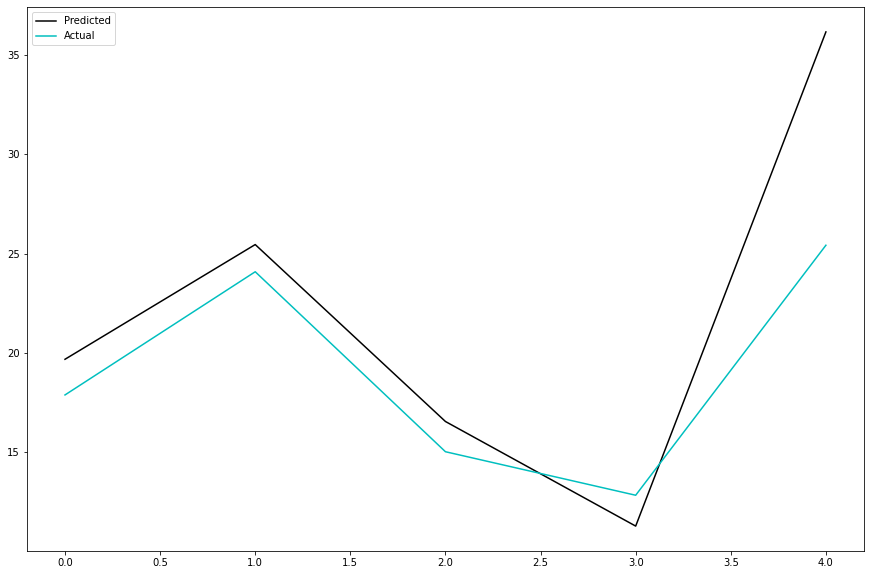

In [68]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_lasso, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

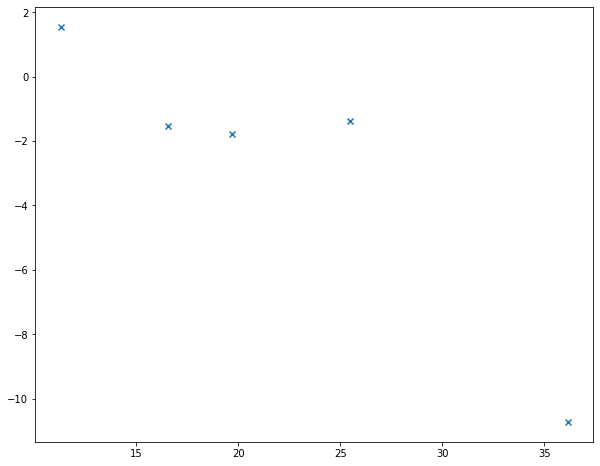

In [69]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_lasso),(y_test)-(y_pred_test_lasso),marker='x')

## **Implementing Elastic Net Regression**

In [70]:
# Initializing model
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [71]:
elnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [72]:
#checking score
elnet.score(X_train, y_train)

0.6169313905120539

In [73]:
# Train Test values
y_pred_train_en=elnet.predict(X_train)
y_pred_test_en=elnet.predict(X_test)

In [74]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 59.403561303182876
RMSE : 7.707370582966857
MAE : 5.915377952837156
R2 : 0.6169313905120539
Adjusted R2 : 1.0356342892546926


In [75]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [76]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 32.05229709280721
RMSE : 5.661474816053429
MAE : 3.8247428371695293
R2 : -0.3152609894345131
Adjusted R2 : 1.1223498594822803


In [77]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

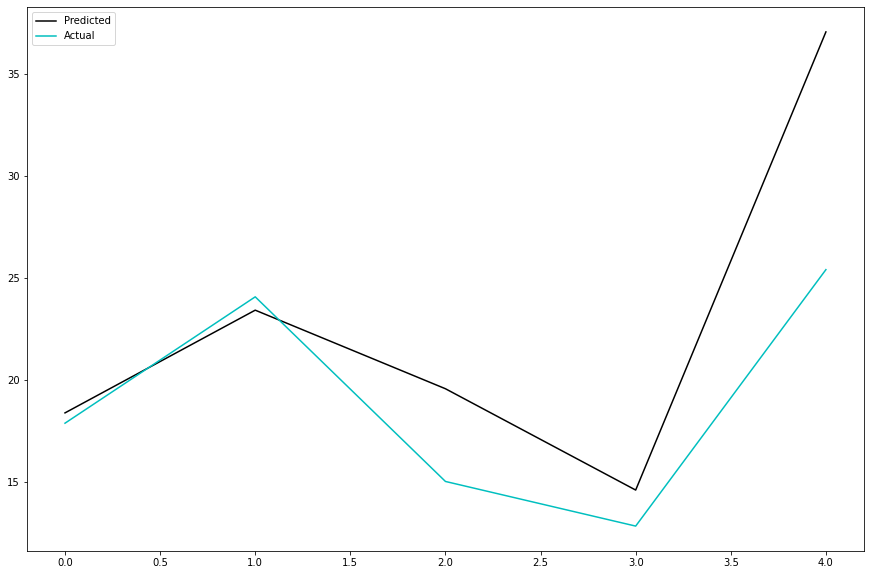

In [78]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en), color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

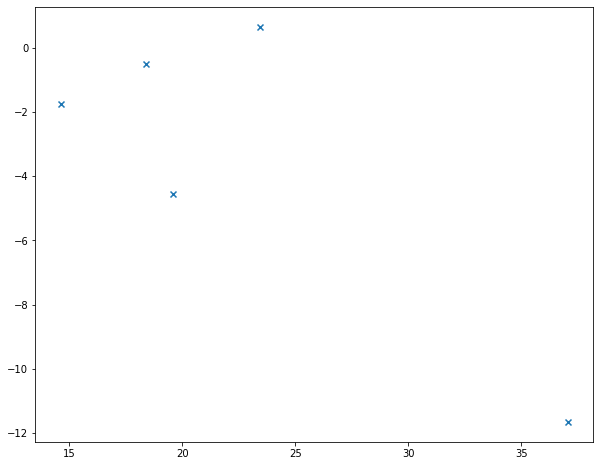

In [79]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en),marker='x')

# **Implementing Decision Tree Regression**

In [80]:
#Initilazing the model
dt_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9, max_leaf_nodes=100)

In [81]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [82]:
#Train Test values
y_pred_train_d = dt_regressor.predict(X_train)
y_pred_test_d = dt_regressor.predict(X_test)

In [83]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 49.11719633467602
RMSE : 7.008366167280076
MAE : 5.197294900164636
R2 : 0.683263836559532
Adjusted R2 : 1.0294638291572529


In [84]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [85]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 58.71101467208325
RMSE : 7.66231131396286
MAE : 6.317619860375176
R2 : -1.409197288566169
Adjusted R2 : 1.224111375680574


In [86]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

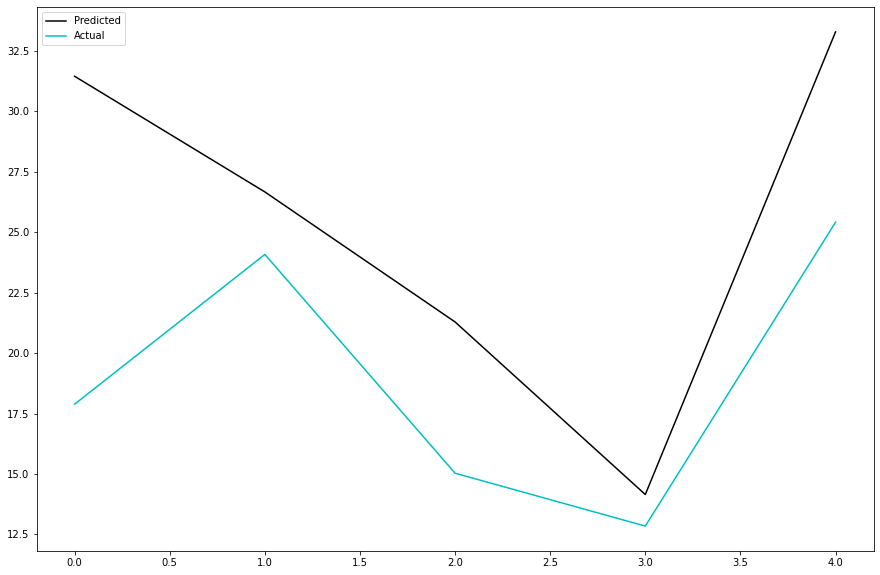

In [87]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_d, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

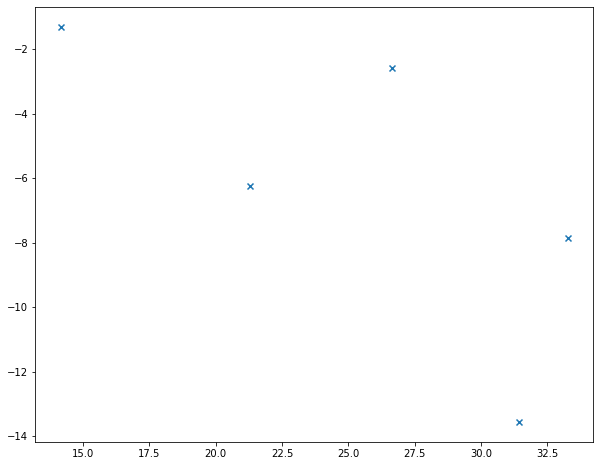

In [88]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d),marker='x')

## **Implementng Random Forest Regression**

In [89]:
# Initalizing the Model
rf_model = RandomForestRegressor()

In [90]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [91]:
#Train test values
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [92]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 1.9015800841352908
RMSE : 1.378977912852592
MAE : 0.9022365410045927
R2 : 0.9877375089526721
Adjusted R2 : 1.0011406968416119


In [93]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [94]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 5.011440587182376
RMSE : 2.2386247088742626
MAE : 1.7681744997275508
R2 : 0.7943563206685451
Adjusted R2 : 1.0191296445889726


In [95]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [96]:
# Feature importances
rf_model.feature_importances_

array([3.07197197e-01, 1.60426454e-01, 1.35552589e-02, 1.34817130e-02,
       2.61766378e-02, 3.28287781e-02, 1.23683460e-03, 4.76476113e-03,
       1.35121004e-02, 2.38380738e-02, 3.31165035e-02, 2.96929245e-02,
       1.09227825e-02, 3.50056148e-03, 1.52157876e-02, 9.14655339e-04,
       2.18070382e-03, 8.60798738e-04, 4.96322380e-04, 2.36638726e-04,
       2.75373575e-04, 1.11592291e-03, 3.41428931e-03, 1.00732962e-02,
       3.39149222e-02, 1.43775682e-02, 1.04381377e-02, 1.03521144e-02,
       7.13810346e-03, 2.72829331e-03, 6.84166684e-03, 1.82570068e-03,
       1.22398890e-02, 3.14031480e-03, 1.59041412e-01, 1.17779594e-03,
       3.01431359e-03, 1.34675207e-03, 1.48105102e-03, 1.55885789e-03,
       1.15806670e-03, 1.76202251e-03, 1.66769692e-03, 1.50234689e-03,
       2.77368073e-03, 9.04491965e-04, 1.05804322e-02])

In [97]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [98]:
plt.style.use('dark_background')

Text(0.5, 0, 'Relative Importance')

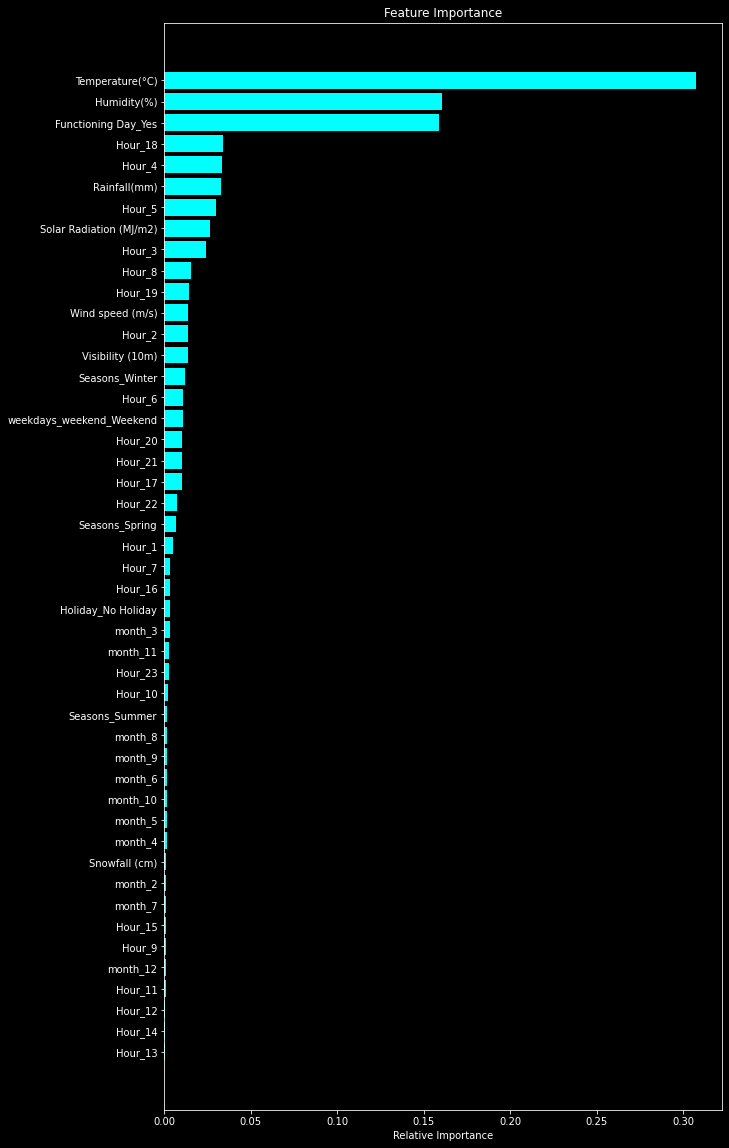

In [99]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

## **Implementing XG Boost Regression**

In [100]:
# Using Pandas get Dummies for Encoding categorical features
df1 = pd.get_dummies(df,drop_first=True,sparse=False) 
X = df1.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df1['Rented Bike Count'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [101]:
# Initializing the model
xgb_r = xgb.XGBRegressor()

In [102]:
#Fitting the model
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [103]:
#Train Test values
y_pred_train_xgb = xgb_r.predict(X_train)
y_pred_test_xgb = xgb_r.predict(X_test)

In [104]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xgb))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xgb))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xgb))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 3.4783809147788998
RMSE : 1.8650417997403972
MAE : 1.3018325656908216
R2 : 0.9774117437372724
Adjusted R2 : 0.9769161097296402


**R2 score value is 0.86 it means that our model is able to capture most of the data variance.**

In [105]:
dict1={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [106]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xgb))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xgb))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xgb))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 14.268169199035887
RMSE : 3.7773230202136387
MAE : 2.560580313334528
R2 : 0.9096759254063012
Adjusted R2 : 0.9076940246098941


In [107]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [108]:
# Feature importances
xgb_r.feature_importances_

array([0.02313511, 0.01941033, 0.00117249, 0.00153003, 0.00782443,
       0.02586562, 0.00287726, 0.00488826, 0.03429088, 0.03923116,
       0.07814232, 0.05650761, 0.01680355, 0.00419498, 0.01310121,
       0.00235391, 0.01300562, 0.0062734 , 0.00139512, 0.00098864,
       0.00207228, 0.00272448, 0.00570411, 0.02706396, 0.06966188,
       0.04754547, 0.0476852 , 0.06017982, 0.06080744, 0.01063866,
       0.00767506, 0.00221026, 0.05026473, 0.0048062 , 0.2145428 ,
       0.00141204, 0.00214004, 0.00135947, 0.00264125, 0.00349684,
       0.00174758, 0.00228374, 0.0023259 , 0.0045516 , 0.00438657,
       0.00088201, 0.00619858], dtype=float32)

In [109]:
features = X_train.columns
importances = xgb_r.feature_importances_
indices = np.argsort(importances)

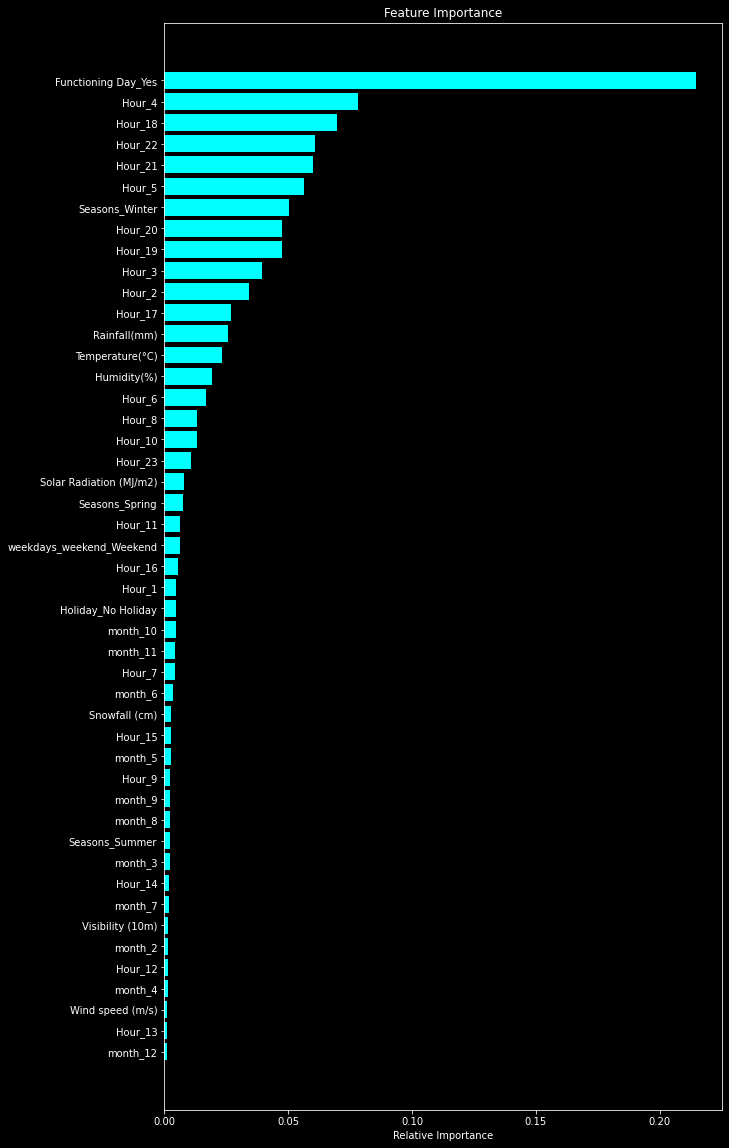

In [110]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **Hyperparameter Tuning**

**For improvement of our model lets do some Hyper parameter tuning.**

## **XG Boost Regressor with GridSearchCV**

In [111]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [112]:
parameter_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [113]:
# Create an instance of the XG Boost Regressor
xg_boost = xgb.XGBRegressor()

# Grid search
xg_grid = GridSearchCV(estimator=xg_boost,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[20:05:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[20:05:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[20:05:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.4s
[20:05:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.4s
[20:05:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.4s
[20:05:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END m

[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=   0.3s
[20:05:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=   0.3s
[20:05:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=   0.3s
[20:05:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_dep

[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.2s
[20:05:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.2s
[20:05:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.2s
[20:05:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_

[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.6s
[20:05:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.6s
[20:05:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.6s
[20:05:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_

[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=80; total time=   0.5s
[20:05:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=80; total time=   0.5s
[20:05:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=150, n_estimators=80; total time=   0.5s
[20:05:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_

[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.2s
[20:06:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.3s
[20:06:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.3s
[20:06:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_

[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.6s
[20:06:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.6s
[20:06:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=   0.5s
[20:06:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END m

[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   0.7s
[20:06:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   0.6s
[20:06:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   0.6s
[20:06:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_

[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.3s
[20:06:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.4s
[20:06:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.4s
[20:06:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_dep

[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.8s
[20:07:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.8s
[20:07:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=   0.8s
[20:07:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END m

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [114]:
xg_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, min_samples_leaf=40,
             min_samples_split=50, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, ...)

In [115]:
xg_optimal_model = xg_grid.best_estimator_

In [116]:
#Train Test values
y_pred_train_xg_opt = xg_optimal_model.predict(X_train)
y_pred_test_xg_opt= xg_optimal_model.predict(X_test)

In [117]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 3.4783809147788998
RMSE : 1.8650417997403972
MAE : 1.3018325656908216
R2 : 0.9774117437372724
Adjusted R2 : 0.9769161097296402


In [118]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [119]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 14.268169199035887
RMSE : 3.7773230202136387
MAE : 2.560580313334528
R2 : 0.9096759254063012
Adjusted R2 : 0.9076940246098941


In [120]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [121]:
xg_optimal_model.feature_importances_

array([0.02313511, 0.01941033, 0.00117249, 0.00153003, 0.00782443,
       0.02586562, 0.00287726, 0.00488826, 0.03429088, 0.03923116,
       0.07814232, 0.05650761, 0.01680355, 0.00419498, 0.01310121,
       0.00235391, 0.01300562, 0.0062734 , 0.00139512, 0.00098864,
       0.00207228, 0.00272448, 0.00570411, 0.02706396, 0.06966188,
       0.04754547, 0.0476852 , 0.06017982, 0.06080744, 0.01063866,
       0.00767506, 0.00221026, 0.05026473, 0.0048062 , 0.2145428 ,
       0.00141204, 0.00214004, 0.00135947, 0.00264125, 0.00349684,
       0.00174758, 0.00228374, 0.0023259 , 0.0045516 , 0.00438657,
       0.00088201, 0.00619858], dtype=float32)

In [122]:
xg_optimal_model.fit(X_train,y_train)

[20:07:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, min_samples_leaf=40,
             min_samples_split=50, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, ...)

In [123]:
features = X_train.columns
importance = xg_optimal_model.feature_importances_
index = np.argsort(importance)

Text(0.5, 0, 'Relative Importance')

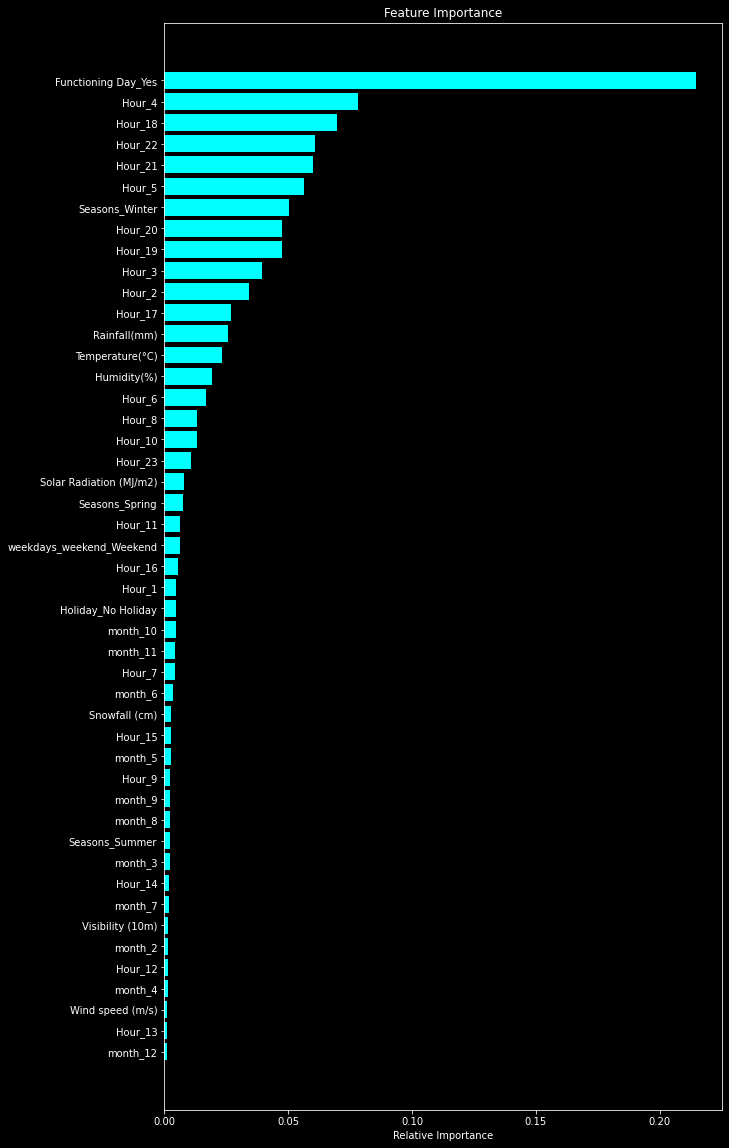

In [124]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(index)), importance[index], color='aqua', align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')

**CONCLUSION**

**In our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable i.e, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.**

**Next we implemented 7 machine learning algorithms Linear Regression, Lasso,Ridge,Elastic Net,Decision Tree, Random Forest, XGBoost and XGBoost with Grid Search CV. We did some hyperparameter tuning to improve our model performance.**

**Following are the results of our evaluation: **


In [125]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE     R2  \
Training set 0          Linear regression   4.648  37.276  6.105  0.760   
             1            Ridge regression  4.648  37.276  6.105  0.760   
             2            Lasso regression  7.306  92.891  9.638  0.401   
             3       Elasticnet regression  5.915  59.404  7.707  0.617   
             4    Decision tree regression  5.197  49.117  7.008  0.683   
             5    Random forest regression  0.902   1.902  1.379  0.988   
             6         XG Boost Regression  1.302   3.478  1.865  0.977   
             7  XG boost regg GridserachCV  1.302   3.478  1.865  0.977   
Test set     0          Linear regression   5.242  41.920  6.475 -0.720   
             1            Ridge regression  5.241  41.919  6.474 -0.720   
             2            Lasso regression  3.392  24.974  4.997 -0.025   
             3       Elasticnet regression  3.825  32.052  5.661 -0.315   
             4    Decision tree regression  6.318  58.711  7.662 -1.409   
             5    Random forest regression  1.768   5.011  2.239  0.794   
             6         XG Boost Regression  2.561  14.268  3.777  0.910   
             7  XG boost regg GridserachCV  2.561  14.268  3.777  0.910   

                Adj_R2  
Training set 0    1.02  
             1    1.02  
             2    1.06  
             3    1.04  
             4    1.03  
             5    1.00  
             6    0.98  
             7    0.98  
Test set     0    1.16  
             1    1.16  
             2    1.10  
             3    1.12  
             4    1.22  
             5    1.02  
             6    0.91  
             7    0.91

# **Final Observations:**

Out of all above models Random forest Regressor gives the highest R2 score of 98% for Train Set and XG Boost Gridsearch CV gives the highest R2 score of 91% for Test set.

No overfitting is seen.

We can deploy XG Boost Gridsearch CV model.